In [21]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, mean_absolute_error, mean_squared_error, classification_report, roc_curve, RocCurveDisplay, auc, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from imblearn.over_sampling import SMOTE


# Load Dataset

In [2]:
data = pd.read_csv('../../Data/DataLaba1/energy_task.csv').dropna()
data


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,11-01-2016 17:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,18.2000,48.900000,17.033333,45.5300,6.60,733.5,92.000000,7.000000,63.000000,5.3
1,11-01-2016 17:10,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,18.2000,48.863333,17.066667,45.5600,6.48,733.6,92.000000,6.666667,59.166667,5.2
2,11-01-2016 17:20,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,18.2000,48.730000,17.000000,45.5000,6.37,733.7,92.000000,6.333333,55.333333,5.1
3,11-01-2016 17:30,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,18.1000,48.590000,17.000000,45.4000,6.25,733.8,92.000000,6.000000,51.500000,5.0
4,11-01-2016 17:40,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,18.1000,48.590000,17.000000,45.4000,6.13,733.9,92.000000,5.666667,47.666667,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,27-05-2016 17:20,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,24.7000,50.074000,23.200000,46.7900,22.70,755.2,55.666667,3.333333,23.666667,13.3
19731,27-05-2016 17:30,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,24.7000,49.790000,23.200000,46.7900,22.60,755.2,56.000000,3.500000,24.500000,13.3
19732,27-05-2016 17:40,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,24.7000,49.660000,23.200000,46.7900,22.50,755.2,56.333333,3.666667,25.333333,13.3
19733,27-05-2016 17:50,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,24.6625,49.518750,23.200000,46.8175,22.30,755.2,56.666667,3.833333,26.166667,13.2


# Normalise data

In [15]:
mm_scaler = MinMaxScaler()
data_scaled = mm_scaler.fit_transform(data.drop(['date'], axis=1))
data_scaled = pd.DataFrame(data_scaled, columns=data.drop(['date'], axis=1).columns)
# data_scaled['date'] = data['date']
# data_scaled
appliances = data_scaled['Appliances']
data_scaled_x = data_scaled.drop(['Appliances'], axis=1)
# data_scaled_x = data.drop(['Appliances', 'date'], axis=1)


In [9]:
data_scaled_x

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,0.428571,0.327350,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,...,0.169103,0.661412,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.537415
1,0.428571,0.327350,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,...,0.169103,0.660155,0.226500,0.678532,0.369132,0.100000,0.894737,0.476190,0.894872,0.532880
2,0.428571,0.327350,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,...,0.169103,0.655586,0.219563,0.676049,0.365595,0.102326,0.894737,0.452381,0.835897,0.528345
3,0.571429,0.327350,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,...,0.159902,0.650788,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.523810
4,0.571429,0.327350,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,...,0.159902,0.650788,0.219563,0.671909,0.357878,0.106977,0.894737,0.404762,0.717949,0.519274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18533,0.000000,0.926786,0.537657,0.711655,0.606309,0.830841,0.579374,0.864865,0.765258,0.752031,...,0.767202,0.701645,0.864724,0.729443,0.890675,0.602326,0.416667,0.238095,0.348718,0.900227
18534,0.000000,0.919747,0.536006,0.701769,0.607836,0.825302,0.582178,0.864865,0.765258,0.754897,...,0.767202,0.691912,0.864724,0.729443,0.887460,0.602326,0.421053,0.250000,0.361538,0.900227
18535,0.142857,0.919747,0.538666,0.692651,0.627198,0.818378,0.603988,0.864865,0.771233,0.754897,...,0.767202,0.687457,0.864724,0.729443,0.884244,0.602326,0.425439,0.261905,0.374359,0.900227
18536,0.142857,0.919747,0.549491,0.677054,0.634717,0.805085,0.585294,0.864865,0.773794,0.752031,...,0.763751,0.682617,0.864724,0.730581,0.877814,0.602326,0.429825,0.273810,0.387179,0.895692


In [11]:
appliances


0        0.047170
1        0.047170
2        0.037736
3        0.037736
4        0.047170
           ...   
18533    0.084906
18534    0.075472
18535    0.245283
18536    0.386792
18537    0.396226
Name: Appliances, Length: 18538, dtype: float64

In [13]:
appliances


0         60
1         60
2         50
3         50
4         60
        ... 
19730    100
19731     90
19732    270
19733    420
19734    430
Name: Appliances, Length: 18538, dtype: int64

In [18]:
data_scaled_x


,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,0.428571,0.327350,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,...,0.169103,0.661412,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.537415
1,0.428571,0.327350,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,...,0.169103,0.660155,0.226500,0.678532,0.369132,0.100000,0.894737,0.476190,0.894872,0.532880
2,0.428571,0.327350,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,...,0.169103,0.655586,0.219563,0.676049,0.365595,0.102326,0.894737,0.452381,0.835897,0.528345
3,0.571429,0.327350,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,...,0.159902,0.650788,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.523810
4,0.571429,0.327350,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,...,0.159902,0.650788,0.219563,0.671909,0.357878,0.106977,0.894737,0.404762,0.717949,0.519274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18533,0.000000,0.926786,0.537657,0.711655,0.606309,0.830841,0.579374,0.864865,0.765258,0.752031,...,0.767202,0.701645,0.864724,0.729443,0.890675,0.602326,0.416667,0.238095,0.348718,0.900227
18534,0.000000,0.919747,0.536006,0.701769,0.607836,0.825302,0.582178,0.864865,0.765258,0.754897,...,0.767202,0.691912,0.864724,0.729443,0.887460,0.602326,0.421053,0.250000,0.361538,0.900227
18535,0.142857,0.919747,0.538666,0.692651,0.627198,0.818378,0.603988,0.864865,0.771233,0.754897,...,0.767202,0.687457,0.864724,0.729443,0.884244,0.602326,0.425439,0.261905,0.374359,0.900227
18536,0.142857,0.919747,0.549491,0.677054,0.634717,0.805085,0.585294,0.864865,0.773794,0.752031,...,0.763751,0.682617,0.864724,0.730581,0.877814,0.602326,0.429825,0.273810,0.387179,0.895692


In [22]:
tree = DecisionTreeClassifier().fit(data_scaled_x, LabelEncoder().fit_transform(appliances))


In [24]:
rfe = RFE(estimator=tree, n_features_to_select=4, step=1).fit(data_scaled_x, LabelEncoder().fit_transform(appliances))
X_rfe = pd.DataFrame(rfe.transform(data_scaled_x), columns=rfe.get_feature_names_out())
X_rfe


,RH_5,RH_8,Press_mm_hg,Tdewpoint
0,0.381691,0.661412,0.097674,0.537415
1,0.381691,0.660155,0.100000,0.532880
2,0.380037,0.655586,0.102326,0.528345
3,0.380037,0.650788,0.104651,0.523810
4,0.380037,0.650788,0.106977,0.519274
...,...,...,...,...
18533,0.339590,0.701645,0.602326,0.900227
18534,0.338487,0.691912,0.602326,0.900227
18535,0.337585,0.687457,0.602326,0.900227
18536,0.336583,0.682617,0.602326,0.895692


<BarContainer object of 25 artists>

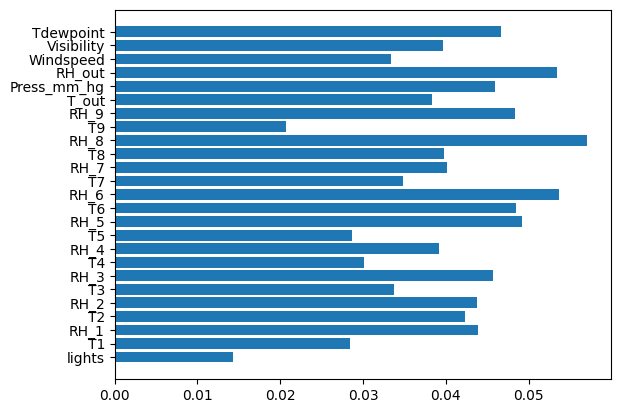

In [25]:
plt.barh(width=tree.feature_importances_, y=data_scaled_x.columns)


In [26]:
data_scaled_x.columns[np.argsort(tree.feature_importances_)]


Index(['lights', 'T9', 'T1', 'T5', 'T4', 'Windspeed', 'T3', 'T7', 'T_out',
       'RH_4', 'Visibility', 'T8', 'RH_7', 'T2', 'RH_2', 'RH_1', 'RH_3',
       'Press_mm_hg', 'Tdewpoint', 'RH_9', 'T6', 'RH_5', 'RH_out', 'RH_6',
       'RH_8'],
      dtype='object')

In [ ]:
models = dict()
test_data = dict()
for i in tree.feature_importances_:
    X_train, X_test, y_train, y_test = train_test_split(data_scaled_x[data_scaled_x.columns[np.argsort(tree.feature_importances_) > i]],
                                                        appliances,
                                                        test_size=0.3)
    models[i] = GridSearchCV(Ridge(), {'alpha': np.arange(0.0001, 0.001, 0.0001)}).fit(X_train, y_train)
    test_data[i] = (X_test, y_test)


In [ ]:
scores = [mean_squared_error, mean_absolute_percentage_error, r2_score]
for m, d in zip(models, test_data):
    for s in scores:
        

# Exp

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data_scaled_x[data_scaled_x.columns[np.argsort(tree.feature_importances_)]],
                                                    appliances, 
                                                    test_size=0.3)


In [44]:
GridSearchCV(Ridge(), {'alpha': np.arange(10**-8, 10**-6, 10**-8)}).fit(X_train, y_train).best_params_

{'alpha': 9.899999999999998e-07}

In [41]:
x = GridSearchCV(Ridge(), {'alpha': np.arange(0.001, 0.1, 0.001)}).fit(X_train, y_train)
x.best_params_


{'alpha': 0.034}

In [32]:
pred = x.best_estimator_.predict(X_test)


In [33]:
print(f"MAE: {mean_absolute_error(pred, y_test)}",
      f'RMSE: {mean_squared_error(pred, y_test)}',
      f'MSE: {mean_squared_error(pred, y_test)**0.5}',
      f'MAPE: {mean_absolute_percentage_error(pred, y_test)}',
      f'R^2: {x.score(X_test, y_test), r2_score(y_test, pred)}',
      sep='\n')


MAE: 0.05041632720211167
RMSE: 0.007958326652324313
MSE: 0.08920945382819195
MAPE: 0.5929027871345816
R^2: (0.13188050408489116, 0.13188050408489116)
